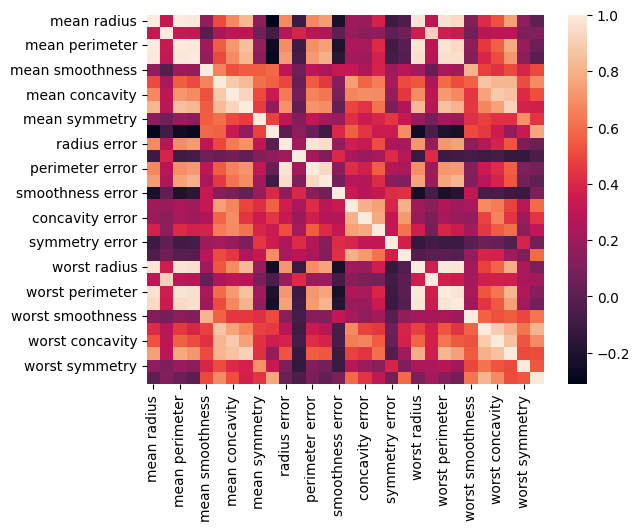




Number of components to explain 90.0% variance: 7


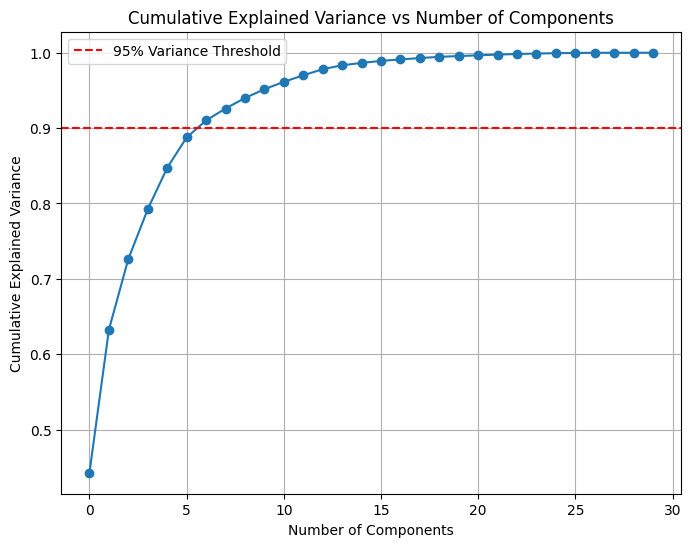

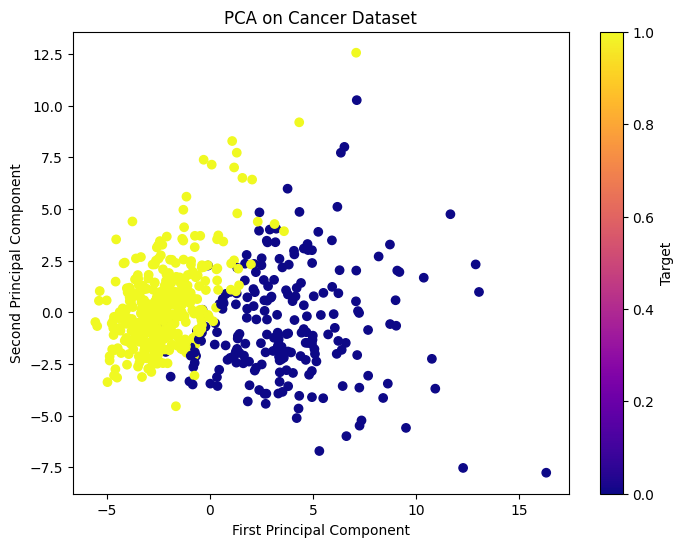

Confusion Matrix: 
 [[ 62   1]
 [  1 107]]
Accuracy:  98.83040935672514
Report: 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        63
           1       0.99      0.99      0.99       108

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



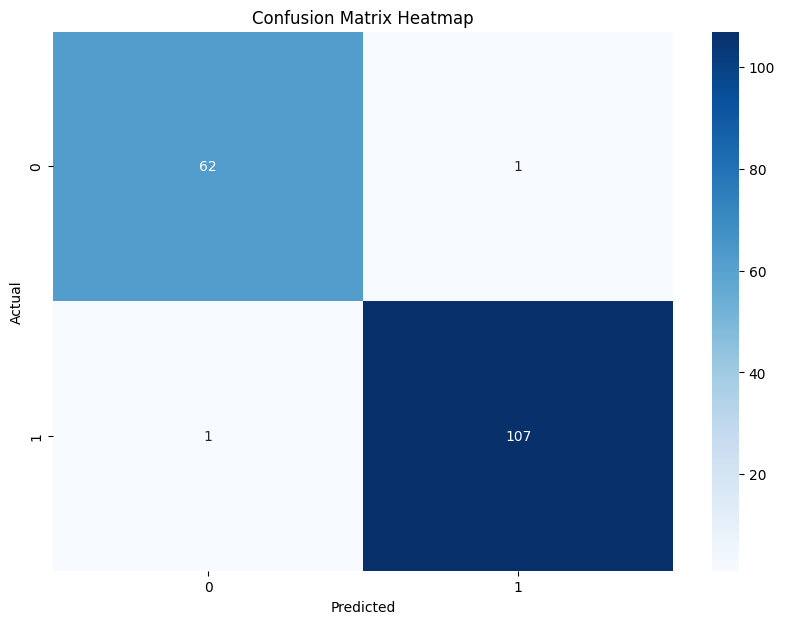

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Load the breast cancer dataset
cancer = load_breast_cancer(as_frame=True)
df = cancer.frame

# Input features
X = df[cancer['feature_names']]
# Target values
y = df['target']

# Standardize the features
X_mean = X.mean()
X_std = X.std()
Z = (X - X_mean) / X_std

c = Z.cov()
# Plot the covariance matrix
sns.heatmap(c)
plt.show()
print("\n\n")

# Apply PCA
pca = PCA()
pca.fit(Z)

# Explained variance ratio and cumulative explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Determine the number of components needed to reach the desired explained variance threshold (e.g., 95%)
num_components = np.argmax(cumulative_explained_variance >= 0.90) + 1
print(f"Number of components to explain {0.90*100}% variance: {num_components}")

# Plot the cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(cumulative_explained_variance, marker='o', linestyle='-')
plt.axhline(y=0.90, color='r', linestyle='--', label='95% Variance Threshold')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs Number of Components')
plt.grid(True)
plt.legend()
plt.show()
print("\n\n")

# Apply PCA with the chosen number of components
pca = PCA(n_components=num_components)
x_pca = pca.fit_transform(Z)

# Create a DataFrame for the PCA-transformed data
df_pca1 = pd.DataFrame(x_pca, columns=[f'PC{i+1}' for i in range(num_components)])
df_pca1['target'] = y

# Optionally, to better visualize the results:
if num_components >= 2:
    plt.figure(figsize=(8, 6))
    plt.scatter(df_pca1.iloc[:, 0], df_pca1.iloc[:, 1], c=y, cmap='plasma')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.title('PCA on Cancer Dataset')
    plt.colorbar(label='Target')
    plt.show()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_pca1.drop('target', axis=1), y, test_size=0.3, random_state=42)

# Function to calculate and print accuracy
def cal_accuracy(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix: \n", cm)
    print("Accuracy: ", accuracy_score(y_test, y_pred) * 100)
    print("Report: \n", classification_report(y_test, y_pred))
    # Plotting the confusion matrix heatmap
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix Heatmap')
    plt.show()

# Create and train the logistic regression model
clf = LogisticRegression(max_iter=10000)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Calculate and print accuracy
cal_accuracy(y_test, y_pred)


